In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('paper')

In [2]:
MERGED_LOAD_DIR = Path(
    Path.cwd().parent, "data.nosync", "transformed_data", "merged.parquet"
)

In [3]:
df = pd.read_parquet(MERGED_LOAD_DIR)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509980 entries, 0 to 15509979
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Time Stamp    datetime64[ns]
 1   Name          object        
 2   PTID          float32       
 3   Load          float32       
 4   Year          int32         
 5   Month         int32         
 6   Day           int32         
 7   Minute        int32         
 8   Hour          int32         
 9   Max Temp      float64       
 10  Min Temp      float64       
 11  Max Wet Bulb  float64       
 12  Min Wet Bulb  float64       
dtypes: datetime64[ns](1), float32(2), float64(4), int32(5), object(1)
memory usage: 1.1+ GB


In [5]:
df.head()

,Time Stamp,Name,PTID,Load,Year,Month,Day,Minute,Hour,Max Temp,Min Temp,Max Wet Bulb,Min Wet Bulb
0,2016-06-22 00:00:00,CAPITL,61757.0,1252.099976,2016,6,22,0,0,27.777778,15.0,18.444444,11.777778
1,2016-06-22 00:05:00,CAPITL,61757.0,1239.199951,2016,6,22,5,0,27.777778,15.0,18.444444,11.777778
2,2016-06-22 00:10:00,CAPITL,61757.0,1241.900024,2016,6,22,10,0,27.777778,15.0,18.444444,11.777778
3,2016-06-22 00:15:00,CAPITL,61757.0,1240.900024,2016,6,22,15,0,27.777778,15.0,18.444444,11.777778
4,2016-06-22 00:20:00,CAPITL,61757.0,1226.900024,2016,6,22,20,0,27.777778,15.0,18.444444,11.777778


# Correlation

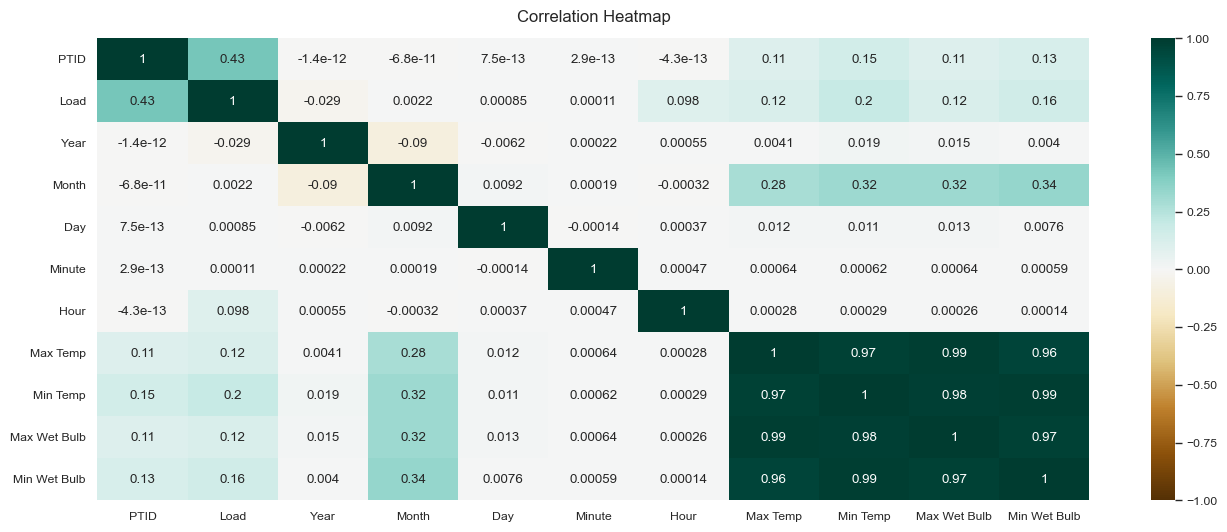

In [6]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(
    df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="BrBG"
)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 12}, pad=12);

# Load vs Temp

In [7]:
df.head()

,Time Stamp,Name,PTID,Load,Year,Month,Day,Minute,Hour,Max Temp,Min Temp,Max Wet Bulb,Min Wet Bulb
0,2016-06-22 00:00:00,CAPITL,61757.0,1252.099976,2016,6,22,0,0,27.777778,15.0,18.444444,11.777778
1,2016-06-22 00:05:00,CAPITL,61757.0,1239.199951,2016,6,22,5,0,27.777778,15.0,18.444444,11.777778
2,2016-06-22 00:10:00,CAPITL,61757.0,1241.900024,2016,6,22,10,0,27.777778,15.0,18.444444,11.777778
3,2016-06-22 00:15:00,CAPITL,61757.0,1240.900024,2016,6,22,15,0,27.777778,15.0,18.444444,11.777778
4,2016-06-22 00:20:00,CAPITL,61757.0,1226.900024,2016,6,22,20,0,27.777778,15.0,18.444444,11.777778


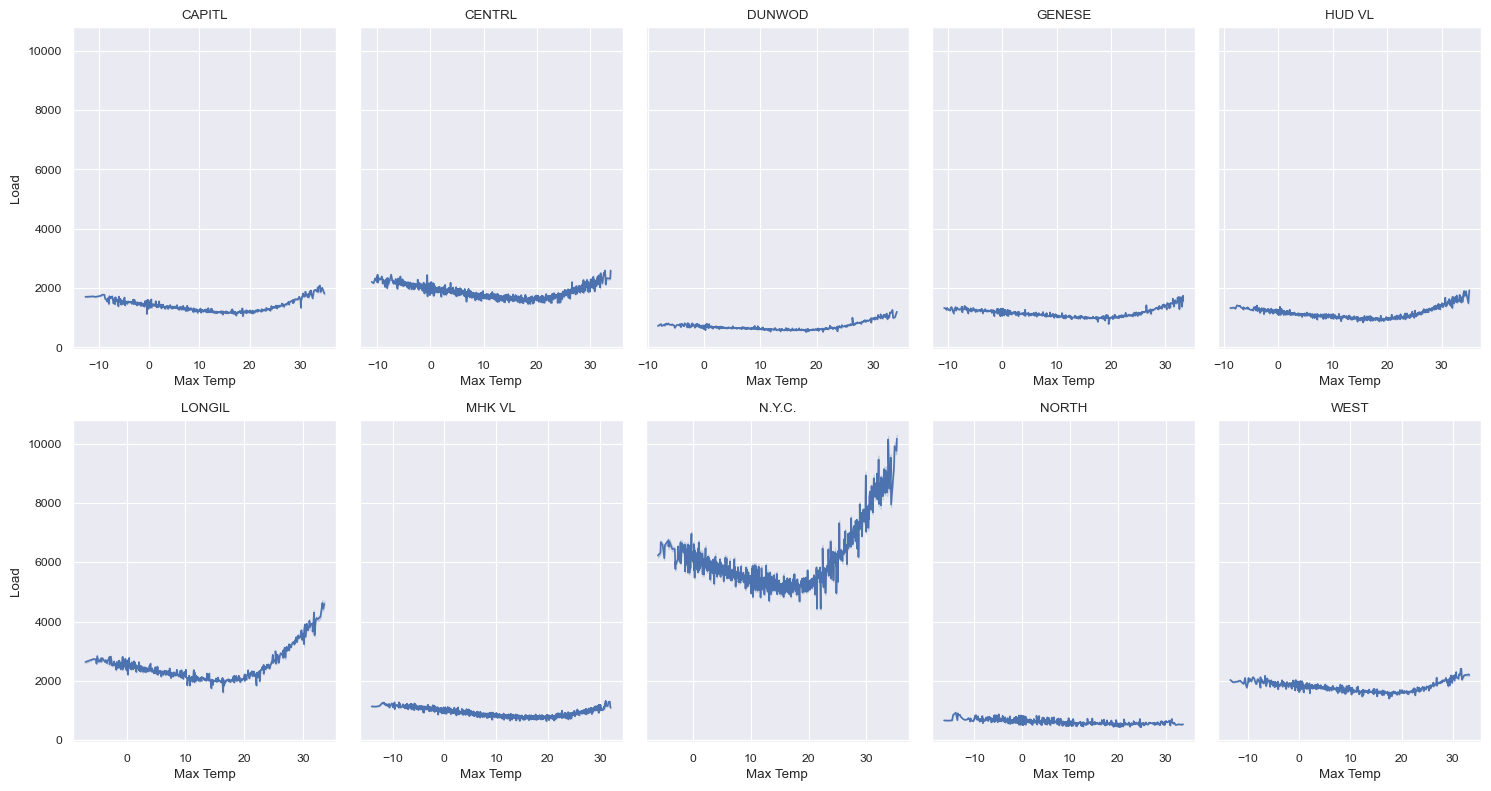

In [8]:
# This takes about 5 mins to plot
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15,8), sharex = False, sharey = True)
for name, ax in zip(df['Name'].unique(), axes.flatten()):
    plotting_df = df[df['Name'] == name]
    sns.lineplot(data = plotting_df, x = 'Max Temp', y = 'Load', ax = ax)
    ax.set_title(name)

plt.tight_layout()

As expected, load increases a little when temperatures are low as people are using their heating, and much more as temperatures increase above 20C, as people start to turn on their AC. As per most other graphs, NYC has substantially higher load than any other area. 